In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

## Data Loading and Pre-processing

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['target'] = df.species
df.target = df.target.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


## Visualizing

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

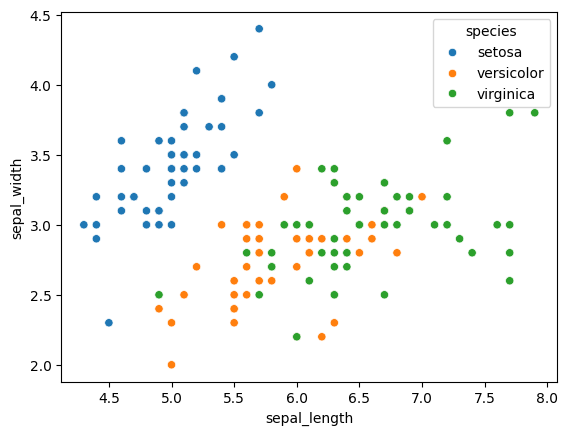

In [4]:
sns.scatterplot(x=df['sepal_length'], y=df['sepal_width'], hue=df['species'])

<Axes: xlabel='petal_length', ylabel='petal_width'>

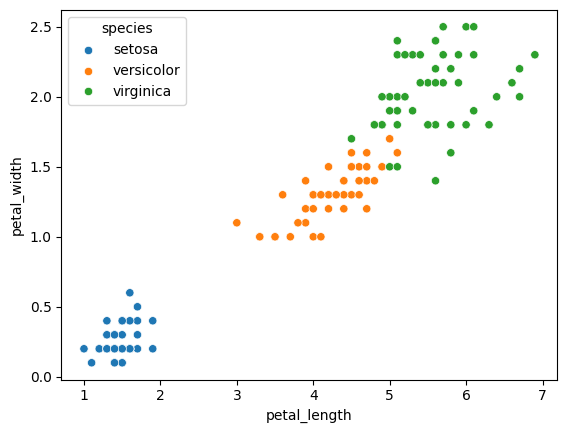

In [5]:
sns.scatterplot(x=df['petal_length'], y=df['petal_width'], hue=df['species'])

## Model

In [6]:
X = df.drop(['species', 'target'], axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
model.score(X_test, y_test)

0.9666666666666667

In [11]:
y_pred = model.predict(X_test)

## Results

In [14]:
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



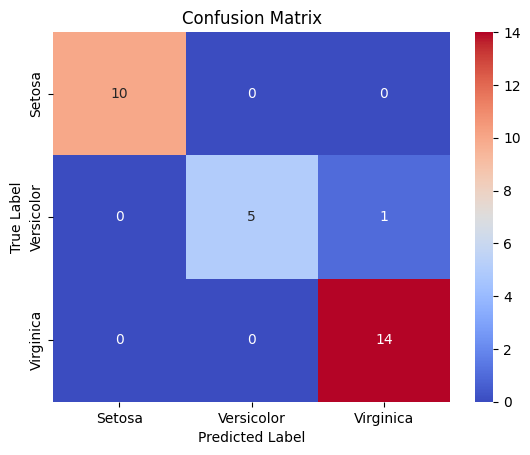

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()